<a href="https://colab.research.google.com/github/Annapoornaaradhya/Whispers_of_Motherhood_AI_for_Postpartum_Healing_-/blob/main/Whispers_of_Motherhood_AI_for_Postpartum_Healing%22_%F0%9F%A4%B1%F0%9F%92%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Whispers of Motherhood: AI for Postpartum Healing🤱💙**

**📝 Problem Statement**\
Postpartum mental health is a critical concern that affects new mothers worldwide. Many struggle with anxiety, depression, and emotional instability but fail to seek timely help due to stigma or lack of awareness. This project leverages machine learning & NLP to analyze journal sentiments and postpartum health data to detect early signs of distress, enabling timely interventions.

**📊 Data Analysis & Preprocessing**\
Dataset 1: journal_sentiments.csv - Contains journal entries & sentiments (Positive, Negative, Neutral).\
Dataset 2: postpartum_health.csv - Contains health records & mental health indicators of postpartum individuals.

**Load and Explore Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_journal = pd.read_csv("/content/drive/MyDrive/Whispers of Motherhood/journal_sentiments.csv", encoding="ISO-8859-1")
df_health = pd.read_csv("/content/drive/MyDrive/Whispers of Motherhood/postpartum_health.csv", encoding="ISO-8859-1")

# Display first few rows
print(df_journal.head())
print(df_health.head())

# Check missing values
print(df_journal.isnull().sum())
print(df_health.isnull().sum())

# Data summary
print(df_journal.describe())
print(df_health.describe())


       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

# **📊 Data Visualization**

<ipython-input-3-e4272befbc49>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_journal["sentiment"], palette="coolwarm")


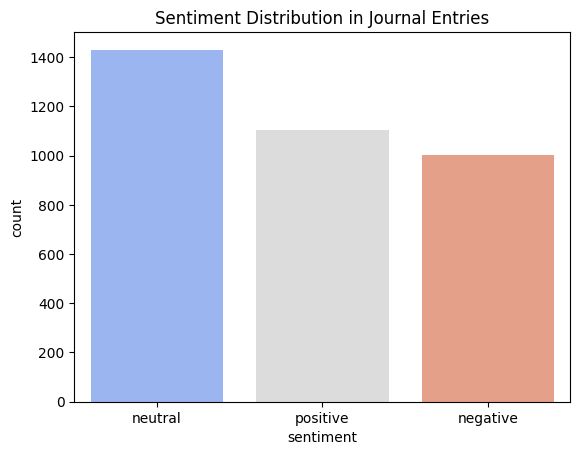

In [3]:
sns.countplot(x=df_journal["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution in Journal Entries")
plt.show()


**Frequency of Symptoms**

<ipython-input-10-2011e576d72d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")  # Bright colors
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


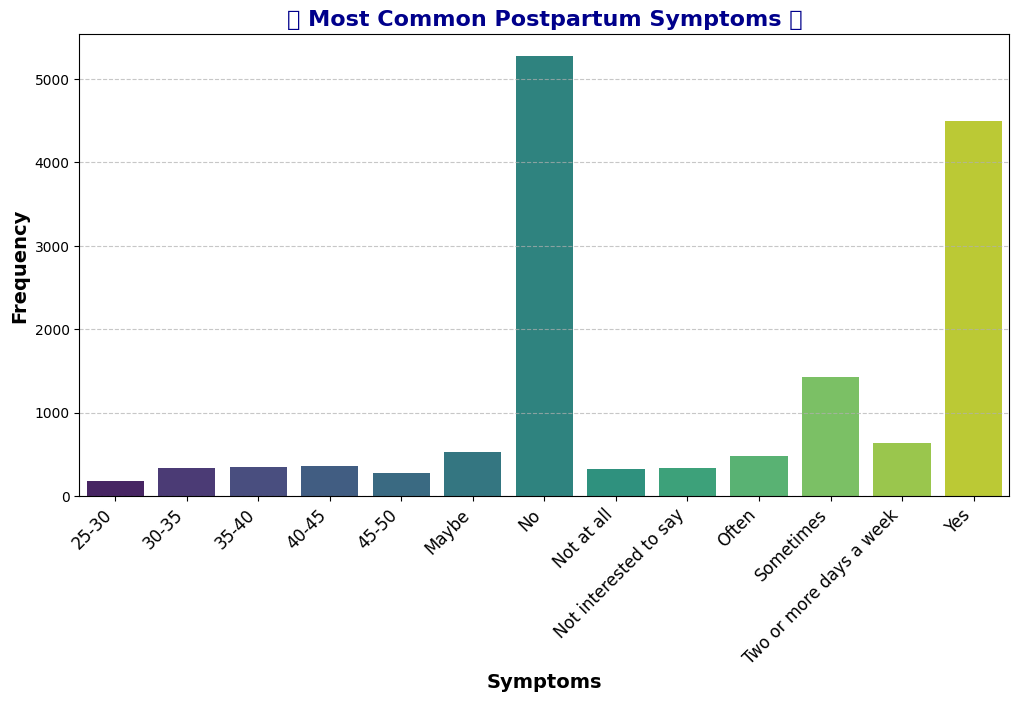

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each symptom
symptom_counts = df_health.iloc[:, 1:].apply(pd.Series.value_counts).sum(axis=1)

# Plot with a vibrant gradient
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")  # Bright colors
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Symptoms", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title("Most Common Postpartum Symptoms", fontsize=16, fontweight="bold", color="darkblue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Proportion of Major Symptoms**

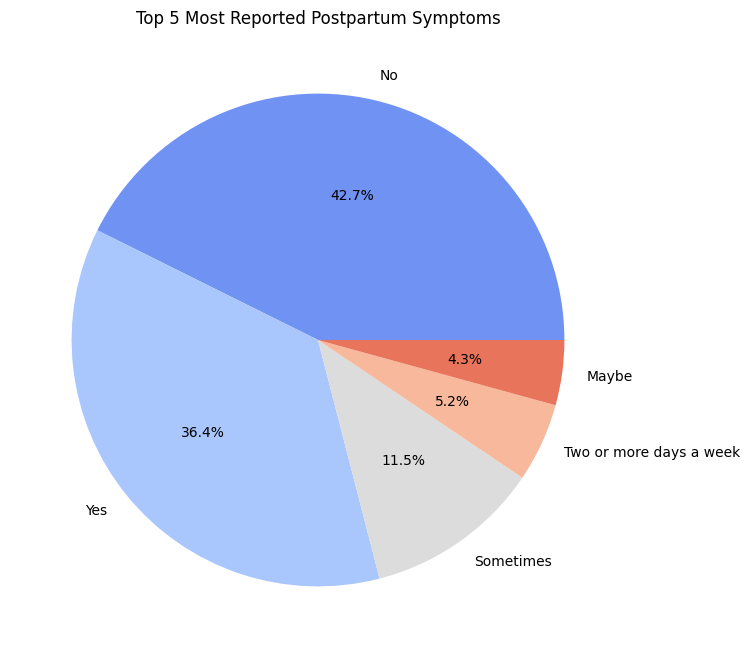

In [12]:
# Take top 5 symptoms
top_symptoms = symptom_counts.nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_symptoms, labels=top_symptoms.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm", 5))
plt.title("Top 5 Most Reported Postpartum Symptoms")
plt.show()


**Heatmap of Co-Occurring Symptoms**\
How often two symptoms appear together?

<ipython-input-14-f1b57622f530>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_symptoms_binary = df_health.iloc[:, 1:].applymap(lambda x: 1 if x == "Yes" else 0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


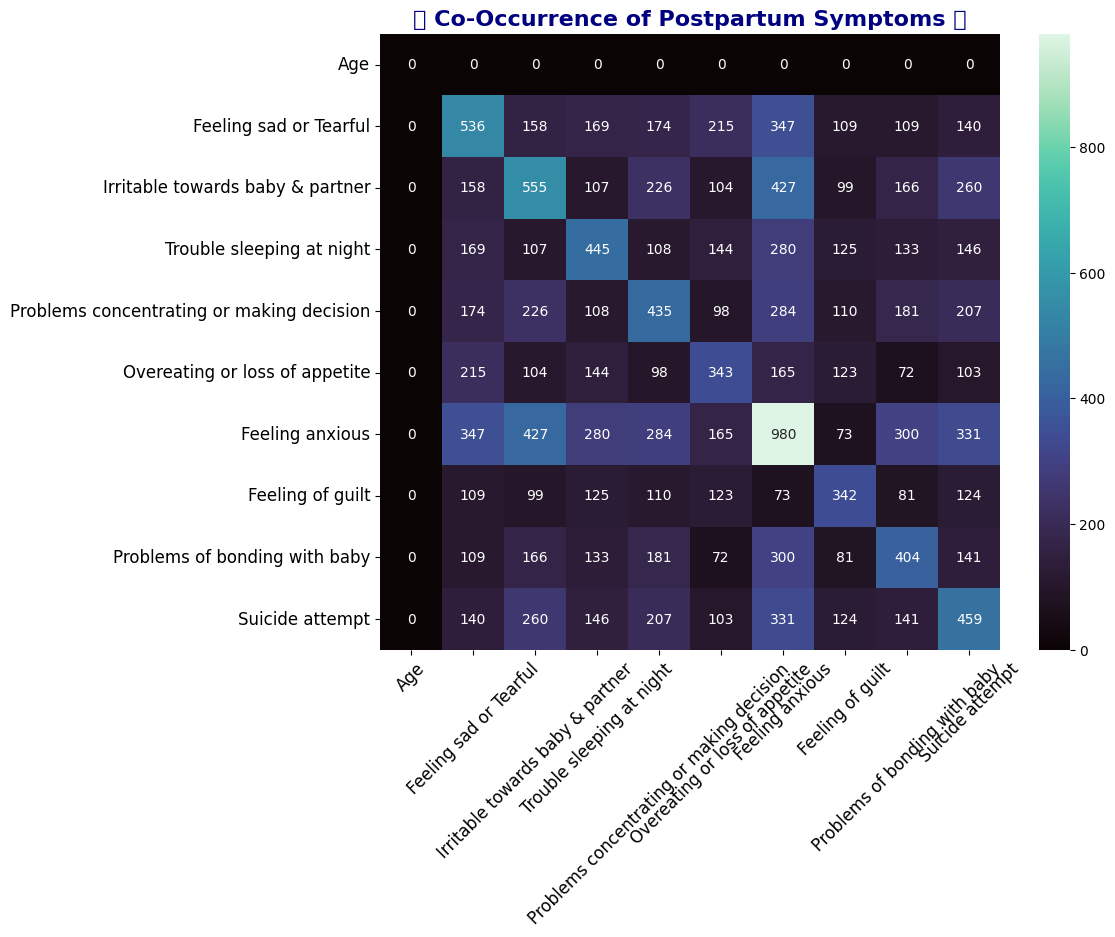

In [14]:
# Convert symptoms to 1 (Yes) / 0 (No)
df_symptoms_binary = df_health.iloc[:, 1:].applymap(lambda x: 1 if x == "Yes" else 0)

# Compute co-occurrence
co_occurrence = df_symptoms_binary.T.dot(df_symptoms_binary)

# Heatmap with a cool color theme
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, cmap="mako", fmt=".0f")  # Cool blue-green aesthetic
plt.title("Co-Occurrence of Postpartum Symptoms ", fontsize=16, fontweight="bold", color="navy")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# **Data Preprocessing**

In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load dataset
df_health = pd.read_csv("/content/drive/MyDrive/Whispers of Motherhood/postpartum_health.csv")

# ✅ Convert 'Age' Ranges to Numeric Medians
age_mapping = {
    "18-24": 21, "25-30": 27.5, "30-35": 32.5, "35-40": 37.5, "40-45": 42.5, "45-50": 47.5
}
if "Age" in df_health.columns:
    df_health["Age"] = df_health["Age"].replace(age_mapping)

# ✅ Convert 'Yes/No' Columns to 1/0
for col in df_health.columns:
    if df_health[col].dtype == "object":  # Check if column is categorical
        unique_values = df_health[col].dropna().unique()
        if set(unique_values) == {"Yes", "No"}:  # Only process Yes/No columns
            df_health[col] = df_health[col].map({"Yes": 1, "No": 0})

# ✅ Drop Non-Numeric Columns (e.g., 'Date')
df_health = df_health.select_dtypes(include=[np.number])  # Keep only numeric columns

# ✅ Handle Missing Values in Health Data
imputer = SimpleImputer(strategy="median")
df_health.iloc[:, :] = imputer.fit_transform(df_health)

# ✅ Standardize Numeric Features
scaler = StandardScaler()
df_health.iloc[:, :] = scaler.fit_transform(df_health)

print("🎉 Data Preprocessing Complete!")


🎉 Data Preprocessing Complete!


<ipython-input-18-fa230da5cc41>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_health["Age"] = df_health["Age"].replace(age_mapping)
<ipython-input-18-fa230da5cc41>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.73052958 -1.36886996  0.73052958 ... -1.36886996  0.73052958
 -1.36886996]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_health.iloc[:, :] = scaler.fit_transform(df_health)


**Train NLP Model for Sentiment Analysis**

🚀 Using Device: cuda


<ipython-input-3-fb082a9e6ab3>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm")


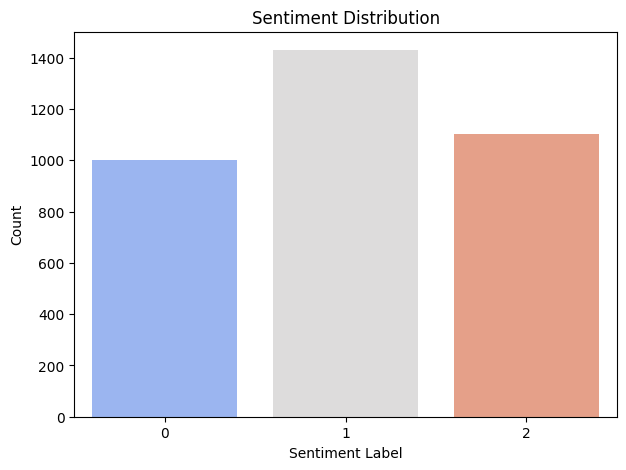

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch [3/3]: 100%|██████████| 354/354 [01:11<00:00,  4.96it/s, acc=91.8, loss=0.329]



✅ Model Accuracy: 74.12%


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73       184
           1       0.70      0.69      0.69       286
           2       0.86      0.77      0.82       237

    accuracy                           0.74       707
   macro avg       0.75      0.75      0.74       707
weighted avg       0.75      0.74      0.74       707

🎉 Model saved at: /content/drive/MyDrive/Whispers of Motherhood/bert_sentiment_model.pth


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# ✅ Set device (Use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using Device: {device}")

# ✅ Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Whispers of Motherhood/journal_sentiments.csv", encoding="ISO-8859-1" )

# ✅ Ensure 'text' column exists
if "text" not in df.columns or "sentiment" not in df.columns:
    raise ValueError("❌ Required columns 'text' and 'sentiment' not found in dataset!")

# ✅ Convert text labels to numeric values
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}  # Define mapping
df["sentiment"] = df["sentiment"].map(sentiment_mapping)  # Apply mapping

# ✅ Handle missing or unknown sentiment values (if any)
df = df.dropna(subset=["sentiment"])  # Remove rows with missing sentiment
df["sentiment"] = df["sentiment"].astype(int)  # Ensure labels are numbers


# ✅ Convert text to string & handle NaNs
df["text"] = df["text"].astype(str).fillna("")
df["sentiment"] = df["sentiment"].astype(int)  # Ensure labels are numbers

# ✅ Data Distribution Visualization
plt.figure(figsize=(7, 5))
sns.countplot(x=df["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

# ✅ Load Pretrained BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# ✅ Custom Dataset Class
class JournalDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=128,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(self.labels[idx], dtype=torch.long),
        }

# ✅ Prepare Dataset & DataLoader
dataset = JournalDataset(df["text"].tolist(), df["sentiment"].tolist())

# ✅ Train-Test Split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# ✅ Load Pretrained BERT Model for Classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(df["sentiment"].unique()))
model.to(device)

# ✅ Define Optimizer & Loss Function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# ✅ Training Function
def train_model(model, train_loader, optimizer, criterion, epochs=3):
    model.train()
    for epoch in range(epochs):
        loop = tqdm(train_loader, leave=True)
        total_loss, correct, total = 0, 0, 0

        for batch in loop:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["label"].to(device),
            )

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            loss.backward()
            optimizer.step()

            # Compute Accuracy
            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            total_loss += loss.item()

            loop.set_description(f"Epoch [{epoch+1}/{epochs}]")
            loop.set_postfix(loss=loss.item(), acc=100 * correct / total)

# ✅ Train Model
train_model(model, train_loader, optimizer, criterion, epochs=3)

# ✅ Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["label"].to(device),
            )
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%\n")
    print("\n🔍 Classification Report:\n", classification_report(all_labels, all_preds))

# ✅ Evaluate Model
evaluate_model(model, test_loader)

# ✅ Save Model for Deployment
model_save_path = "/content/drive/MyDrive/Whispers of Motherhood/bert_sentiment_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"🎉 Model saved at: {model_save_path}")


**Train ML Model for Health Analysis**

✅ Model Accuracy: 96.01%

🔹 Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       206
         1.0       0.96      0.92      0.94        95

    accuracy                           0.96       301
   macro avg       0.96      0.95      0.95       301
weighted avg       0.96      0.96      0.96       301



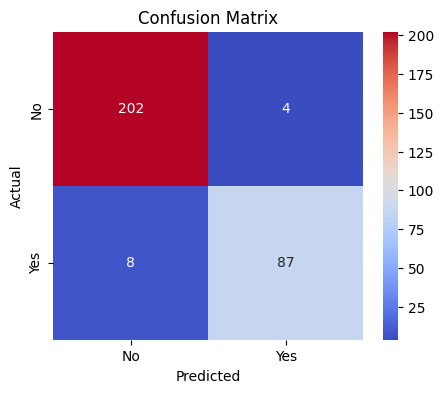

✅ Model saved successfully!


In [10]:
# ✅ Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# ✅ Load Dataset
df_health = pd.read_csv('/content/drive/MyDrive/Whispers of Motherhood/postpartum_health.csv')

# ✅ Drop Non-relevant Columns
df_health = df_health.drop(columns=['Timestamp'])

# ✅ Convert Categorical Values to Numeric
yes_no_map = {"Yes": 1, "No": 0, "Maybe": 0.5, "Sometimes": 0.5}
for col in df_health.columns[1:]:  # Skip 'Age'
    df_health[col] = df_health[col].map(yes_no_map)

# ✅ Handle Age Column (Convert Ranges to Midpoints)
age_map = {
    "20-25": 22.5, "25-30": 27.5, "30-35": 32.5, "35-40": 37.5, "40-45": 42.5, "45-50": 47.5
}
df_health['Age'] = df_health['Age'].map(age_map)

# ✅ Handle Missing Values
imputer = SimpleImputer(strategy='median')
df_health.iloc[:, :] = imputer.fit_transform(df_health)

# ✅ Define Features and Target
X = df_health.drop(columns=["Suicide attempt"])  # Predicting Suicide Attempt
y = df_health["Suicide attempt"]

# ✅ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train ML Model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = model.predict(X_test)

# ✅ Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2%}")

# ✅ Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Save Model
import joblib
joblib.dump(model, "/content/drive/MyDrive/Whispers of Motherhood/postpartum_health_model.pkl")
print("✅ Model saved successfully!")


**Model Evaluation**

✅ Model Accuracy: 96.01%

🔹 Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       206
         1.0       0.96      0.92      0.94        95

    accuracy                           0.96       301
   macro avg       0.96      0.95      0.95       301
weighted avg       0.96      0.96      0.96       301



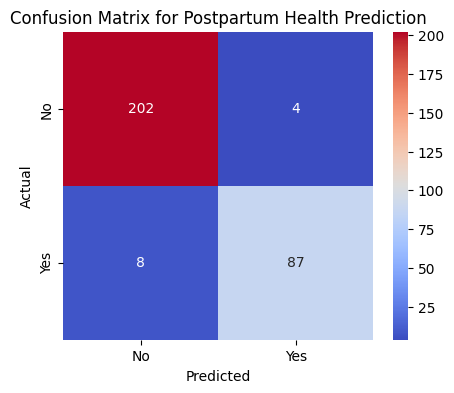

In [12]:
# ✅ Import Required Libraries
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Load the Saved Model
model = joblib.load("/content/drive/MyDrive/Whispers of Motherhood/postpartum_health_model.pkl")

# ✅ Reload Dataset (Ensure Consistency)
df_health = pd.read_csv('/content/drive/MyDrive/Whispers of Motherhood/postpartum_health.csv')
df_health = df_health.drop(columns=['Timestamp'])

# ✅ Convert Categorical Values to Numeric
yes_no_map = {"Yes": 1, "No": 0, "Maybe": 0.5, "Sometimes": 0.5}
for col in df_health.columns[1:]:
    df_health[col] = df_health[col].map(yes_no_map)

# ✅ Handle Age Column (Convert Ranges to Midpoints)
age_map = {
    "20-25": 22.5, "25-30": 27.5, "30-35": 32.5, "35-40": 37.5, "40-45": 42.5, "45-50": 47.5
}
df_health['Age'] = df_health['Age'].map(age_map)

# ✅ Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_health.iloc[:, :] = imputer.fit_transform(df_health)

# ✅ Define Features and Target
X = df_health.drop(columns=["Suicide attempt"])
y = df_health["Suicide attempt"]

# ✅ Split Data (Same as Before)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Make Predictions
y_pred = model.predict(X_test)

# ✅ Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2%}")

# ✅ Generate Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Postpartum Health Prediction")
plt.show()


# **🚀 Cluster Analysis for Postpartum Health Patterns**


🔹 Goal: Identify hidden patterns in postpartum health conditions using clustering techniques.\
🔹 Method: We will use K-Means Clustering to group individuals based on their health responses.\
🔹 Outcome: Helps in segmenting different postpartum experiences for better support systems.

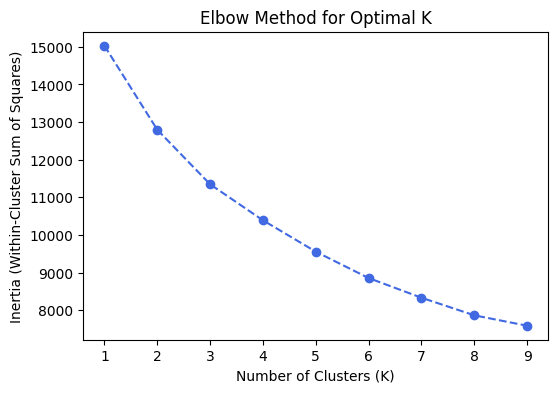

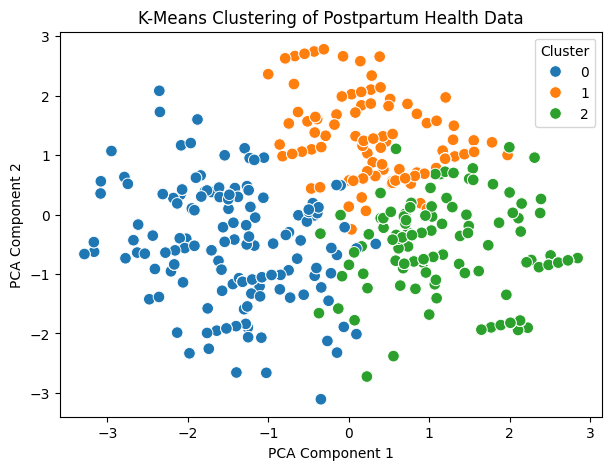


🔹 Cluster Distribution:
 Cluster
0    530
1    491
2    482
Name: count, dtype: int64


,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Cluster,PCA1,PCA2
0,37.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2,1.075087,0.682400
1,42.5,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,-2.354335,2.083236
2,37.5,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.5,0.0,1,-0.416092,1.643252
3,37.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,0.0,0.0,2,0.248212,-0.331880
4,42.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.728357,1.862309
5,32.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2,0.581830,-0.775816
6,42.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,2.208014,-0.802530
7,37.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.228757,0.728238
8,37.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,0.614488,-0.404979
9,32.5,0.5,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.0,1,0.160226,0.288205


In [15]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ✅ Load Dataset
df_health = pd.read_csv('/content/drive/MyDrive/Whispers of Motherhood/postpartum_health.csv')
df_health = df_health.drop(columns=['Timestamp'])

# ✅ Convert Categorical Responses to Numeric
yes_no_map = {"Yes": 1, "No": 0, "Maybe": 0.5, "Sometimes": 0.5}
for col in df_health.columns[1:]:
    df_health[col] = df_health[col].map(yes_no_map)

# ✅ Convert Age Ranges to Midpoints
age_map = {
    "20-25": 22.5, "25-30": 27.5, "30-35": 32.5, "35-40": 37.5, "40-45": 42.5, "45-50": 47.5
}
df_health['Age'] = df_health['Age'].map(age_map)

# ✅ Handle Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_health.iloc[:, :] = imputer.fit_transform(df_health)

# ✅ Normalize Data (Required for Clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_health)

# ✅ Find Optimal Clusters using Elbow Method
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# ✅ Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker="o", linestyle="--", color="royalblue")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# ✅ Apply K-Means Clustering (Choosing K=3 from Elbow Curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_health["Cluster"] = kmeans.fit_predict(df_scaled)

# ✅ PCA for Dimensionality Reduction (For Visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_health["PCA1"] = df_pca[:, 0]
df_health["PCA2"] = df_pca[:, 1]

# ✅ Visualize Clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_health, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=70)
plt.title("K-Means Clustering of Postpartum Health Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# ✅ Print Cluster Distribution
print("\n🔹 Cluster Distribution:\n", df_health["Cluster"].value_counts())

# ✅ Display Sample Data with Clusters
df_health.head(10)
